# ===========================================================
# 09 Plotting

# Objectives
- Create a time series plot showing a single data set.
- Create a scatter plot showing relationship between two data sets.

## Matplotlib
- [`matplotlib`](https://matplotlib.org/) is a widely used scientific plotting library in Python.
- Pandas is built on top of Matplotlib
- A commonly used sub-library is called [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
- The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Matplotlib usage
- Here is the general outline for creating a plot
  using Matplotlib

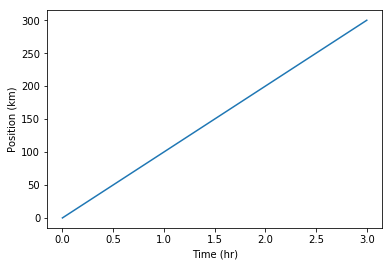

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)');  # `;` is not Python. This makes the notebook surpress extra messages from Matplotlib

## Plotting with Pandas
- Since Pandas is built on matplotlib, we can plot data directly from a dataframe.
- Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values

In [3]:
import pandas as pd

data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)', 
# so we want to keep the (year) part only; this provides clarity when plotting GDP against years.
# To do this we use strip(), which removes the characters stated in the argument from the string.
# This method works on strings, so we call str() before strip().

years = data.columns.str.strip('gdpPercap_')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

# Look at it now

data

1952         1957         1962         1967         1972  \
country                                                                        
Australia    10039.59564  10949.64959  12217.22686  14526.12465  16788.62948   
New Zealand  10556.57566  12247.39532  13175.67800  14463.91893  16046.03728   

                    1977         1982         1987         1992         1997  \
country                                                                        
Australia    18334.19751  19477.00928  21888.88903  23424.76683  26997.93657   
New Zealand  16233.71770  17632.41040  19007.19129  18363.32494  21050.41377   

                    2002         2007  
country                                
Australia    30687.75473  34435.36744  
New Zealand  23189.80135  25185.00911

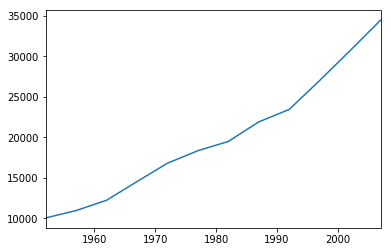

In [4]:
# Plot the data for Australia
data.loc['Australia'].plot();

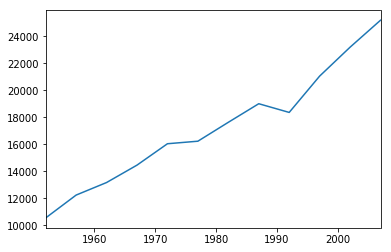

In [5]:
# 1. Plot the data for New Zealand
data.loc['New Zealand'].plot();

# Tranposing for a Plot

- By default, dataframes plot with the rows as the X axis.
- We can transpose the data in order to plot multiple series.

Text(0,0.5,'GDP per capita')

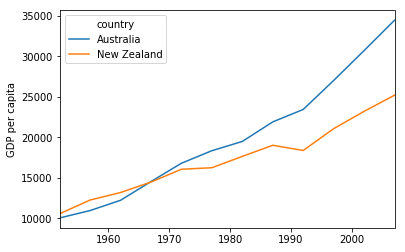

In [6]:
data.T.plot()
plt.ylabel('GDP per capita')

## Plot Types
- Many styles of plot are available.

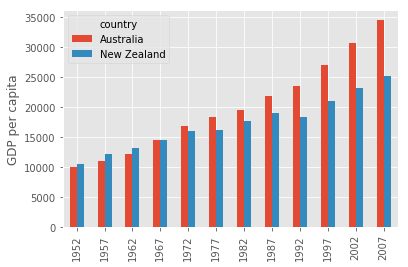

In [7]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita');

- `.plot` has many attributes, including all the plot types it can produce

In [8]:
# List available plots
[method_name for method_name in dir(data.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

- Let's make a scatter plot of Australia's GDP against New Zealand's GDP.

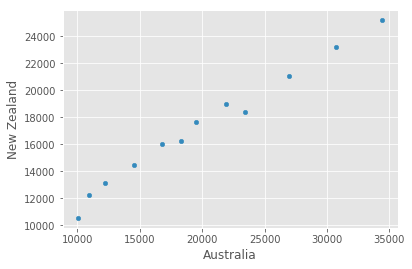

In [9]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand');

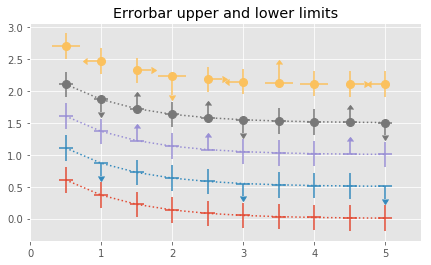

In [10]:
"""
===========================================================
Demo of how to include upper and lower limits in error bars
===========================================================

In matplotlib, errors bars can have "limits". Applying limits to the
error bars essentially makes the error unidirectional. Because of that,
upper and lower limits can be applied in both the y- and x-directions
via the ``uplims``, ``lolims``, ``xuplims``, and ``xlolims`` parameters,
respectively. These parameters can be scalar or boolean arrays.

For example, if ``xlolims`` is ``True``, the x-error bars will only
extend from the data towards increasing values. If ``uplims`` is an
array filled with ``False`` except for the 4th and 7th values, all of the
y-error bars will be bidirectional, except the 4th and 7th bars, which
will extend from the data towards decreasing y-values.
"""

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# including lower limits
ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
            linestyle=ls)

# including upper and lower limits
ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
            lolims=lolims, uplims=uplims,
            marker='o', markersize=8,
            linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle='none')

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

# Objectives
- Create a time series plot showing a single data set.
- Create a scatter plot showing relationship between two data sets.